In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from datetime import date

In [5]:
import seaborn as sns

In [ ]:
#IMPORTING DATA

In [6]:
data = pd.read_csv("Data_Analyst_Take_Home.csv")

In [7]:
data.head()

,DATE,CUSTOMER ID,orderid,RestaurantId
0,2021/01/30,rededuf,49087764,1280
1,2021/02/11,1deesus,50281843,1280
2,2021/02/13,1usrfdn,50515965,1280
3,2021/02/14,eeddrdn,50655182,1280
4,2021/02/15,1rr1u1n,50760529,1280


In [ ]:
#ARRANGING /GROUPING DATA BY CUSTOMERID

In [8]:
sorted_customerID= data.sort_values('CUSTOMER ID',ascending =False)

In [9]:
sorted_customerID

,DATE,CUSTOMER ID,orderid,RestaurantId
72947,2021/05/19,uu2d,61155888,4274
99885,2021/02/03,uu2d,49490494,10751
99881,2021/01/18,uu2d,47907936,10751
31003,2021/01/24,uruuud,48488836,13132
16590,2021/02/22,uruuud,51438344,17198
...,...,...,...,...
91925,2021/04/05,11111fu,56229305,13286
6132,2021/01/31,11111fu,49267479,1555
91942,2021/05/29,11111fu,62495874,13286
27477,2021/01/28,1.21E+24,48897444,10310


In [10]:
#Insight 1
#Customer Id that placed the fouth most orders

In [11]:
Customer_Id_count = data.groupby(['CUSTOMER ID'])['orderid'].count().reset_index(name ='Count').sort_values(['Count'], ascending = False)
Customer_Id_count.head(4)

,CUSTOMER ID,Count
19682,1udns1n,56
20768,1ue2du2,47
18503,1udd2n2,47
13510,1nusf12,40


In [13]:
#Insight 2
#What was the average number of oders placed by all customers over the period,rounded off to 3 decimal places

In [14]:
Customer_Id_count.describe()

,Count
count,42443.000000
mean,2.356101
std,2.457000
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,56.000000


In [ ]:
#OR YOU CAN MANUALLY CALCULATE THE AVERAGE

In [15]:
total=Customer_Id_count['Count'].sum()

In [16]:
total

100000

In [17]:
Average = total/42443

In [18]:
Average

2.356101123860236

In [19]:
#Insight 3
#Number of Customers that only placed 1 order

In [20]:
One_order_Customers =Customer_Id_count[(Customer_Id_count.Count ==1)]
One_order_Customers.count()


CUSTOMER ID    21990
Count          21990
dtype: int64

In [21]:
One_order_Customers

,CUSTOMER ID,Count
34795,nd2erds,1
34878,nddd1sr,1
34870,ndd2re1,1
34790,nd2eddf,1
2432,12dsrdu,1
...,...,...
26791,1usdef2,1
26790,1usdeen,1
5115,1dd1en2,1
26788,1usdeds,1


In [22]:


#insight 4  FOR CUSTOMERS WHO PLACED ATLEAST 3 ORDERS ,WHAT WAS THE AVERAGE NUMBER OF DAYS BETWEEN THEIR FIRST AND THIRD ORDER.
sorted_customerID= data.sort_values('CUSTOMER ID',ascending =False)

arranged_data =sorted_customerID .groupby('CUSTOMER ID',as_index=False).apply(lambda x:x.sort_values('DATE')).reset_index(drop=True)

Customer_ID_GREATERTHAN3 = arranged_data.loc[arranged_data.groupby('CUSTOMER ID')['CUSTOMER ID'].transform('size').loc[lambda x: x >= 3].index]

min_dates = Customer_ID_GREATERTHAN3.groupby(['CUSTOMER ID'])['DATE'].min()

Customer_ID_GREATERTHAN3['First Purchase Date'] = Customer_ID_GREATERTHAN3.apply(lambda row: min_dates.loc[row['CUSTOMER ID']], axis=1)
third_dates = Customer_ID_GREATERTHAN3.groupby(['CUSTOMER ID'])['DATE'].nth(2)

Customer_ID_GREATERTHAN3['Third Purchase Date']=Customer_ID_GREATERTHAN3 .apply(lambda row: third_dates.loc[row['CUSTOMER ID']], axis=1)

Customer_ID_GREATERTHAN3[['First Purchase Date','Third Purchase Date']] = Customer_ID_GREATERTHAN3[['First Purchase Date','Third Purchase Date']].apply(pd.to_datetime)
#if conversion required
Customer_ID_GREATERTHAN3['Difference'] = (Customer_ID_GREATERTHAN3['Third Purchase Date'] - Customer_ID_GREATERTHAN3['First Purchase Date']).dt.days

Customer_ID_GREATERTHAN3.drop_duplicates(subset =['CUSTOMER ID','Difference'], inplace=True)
Customer_ID_GREATERTHAN3.describe()

,orderid,RestaurantId,Difference
count,1.179300e+04,11793.000000,11793.000000
mean,5.082871e+07,10390.824727,50.222335
std,2.674936e+06,5374.020547,34.654296
min,4.760533e+07,4.000000,0.000000
25%,4.899829e+07,3791.000000,21.000000
50%,5.012562e+07,11809.000000,43.000000
75%,5.177015e+07,14710.000000,75.000000
max,6.454618e+07,18598.000000,151.000000


In [23]:
Customer_ID_GREATERTHAN3

,DATE,CUSTOMER ID,orderid,RestaurantId,First Purchase Date,Third Purchase Date,Difference
2,2021/01/31,11111fu,49267479,1555,2021-01-31,2021-05-29,118
6,2021/02/07,1111rrr,49947494,16155,2021-02-07,2021-05-27,109
12,2021/02/26,1112d22,51909665,12928,2021-02-26,2021-05-15,78
39,2021/02/07,111de2r,49988858,15001,2021-02-07,2021-03-21,42
45,2021/01/17,111dfes,47882463,10715,2021-01-17,2021-05-16,119
...,...,...,...,...,...,...,...
99973,2021/04/18,urruf1,57642709,12895,2021-04-18,2021-05-25,37
99980,2021/03/20,ursfef,54334439,1047,2021-03-20,2021-04-20,31
99983,2021/01/28,ursn1e,48891518,550,2021-01-28,2021-02-12,15
99992,2021/01/24,uruuud,48488836,13132,2021-01-24,2021-02-22,29


In [130]:
#insight 4 How many customers placed more than 8 orders.


In [25]:
sorted_customerID= data.sort_values('CUSTOMER ID',ascending =False)

In [26]:
sorted_customerID

,DATE,CUSTOMER ID,orderid,RestaurantId
72947,2021/05/19,uu2d,61155888,4274
99885,2021/02/03,uu2d,49490494,10751
99881,2021/01/18,uu2d,47907936,10751
31003,2021/01/24,uruuud,48488836,13132
16590,2021/02/22,uruuud,51438344,17198
...,...,...,...,...
91925,2021/04/05,11111fu,56229305,13286
6132,2021/01/31,11111fu,49267479,1555
91942,2021/05/29,11111fu,62495874,13286
27477,2021/01/28,1.21E+24,48897444,10310


In [27]:
arranged_data =sorted_customerID .groupby('CUSTOMER ID',as_index=False).apply(lambda x:x.sort_values('DATE')).reset_index(drop=True)

In [28]:
arranged_data

,DATE,CUSTOMER ID,orderid,RestaurantId
0,2021/01/31,1.11E+24,49188436,12262
1,2021/01/28,1.21E+24,48897444,10310
2,2021/01/31,11111fu,49267479,1555
3,2021/04/05,11111fu,56229305,13286
4,2021/05/29,11111fu,62495874,13286
...,...,...,...,...
99995,2021/03/20,uruuud,54350505,13132
99996,2021/04/23,uruuud,58206291,13169
99997,2021/01/18,uu2d,47907936,10751
99998,2021/02/03,uu2d,49490494,10751


In [29]:
Customer_ID_GREATERTHAN3 = arranged_data.loc[arranged_data.groupby('CUSTOMER ID')['CUSTOMER ID'].transform('size').loc[lambda x: x >= 3].index]

In [30]:
Customer_ID_GREATERTHAN3

,DATE,CUSTOMER ID,orderid,RestaurantId
2,2021/01/31,11111fu,49267479,1555
3,2021/04/05,11111fu,56229305,13286
4,2021/05/29,11111fu,62495874,13286
6,2021/02/07,1111rrr,49947494,16155
7,2021/02/16,1111rrr,50791680,17265
...,...,...,...,...
99995,2021/03/20,uruuud,54350505,13132
99996,2021/04/23,uruuud,58206291,13169
99997,2021/01/18,uu2d,47907936,10751
99998,2021/02/03,uu2d,49490494,10751


In [31]:
min_dates = Customer_ID_GREATERTHAN3.groupby(['CUSTOMER ID'])['DATE'].min()
Customer_ID_GREATERTHAN3['First Purchase Date'] = Customer_ID_GREATERTHAN3.apply(lambda row: min_dates.loc[row['CUSTOMER ID']], axis=1)

In [32]:
Customer_ID_GREATERTHAN3

,DATE,CUSTOMER ID,orderid,RestaurantId,First Purchase Date
2,2021/01/31,11111fu,49267479,1555,2021/01/31
3,2021/04/05,11111fu,56229305,13286,2021/01/31
4,2021/05/29,11111fu,62495874,13286,2021/01/31
6,2021/02/07,1111rrr,49947494,16155,2021/02/07
7,2021/02/16,1111rrr,50791680,17265,2021/02/07
...,...,...,...,...,...
99995,2021/03/20,uruuud,54350505,13132,2021/01/24
99996,2021/04/23,uruuud,58206291,13169,2021/01/24
99997,2021/01/18,uu2d,47907936,10751,2021/01/18
99998,2021/02/03,uu2d,49490494,10751,2021/01/18


In [33]:
third_dates = Customer_ID_GREATERTHAN3.groupby(['CUSTOMER ID'])['DATE'].nth(2)
Customer_ID_GREATERTHAN3['Third Purchase Date']=Customer_ID_GREATERTHAN3 .apply(lambda row: third_dates.loc[row['CUSTOMER ID']], axis=1)

In [34]:
Customer_ID_GREATERTHAN3

,DATE,CUSTOMER ID,orderid,RestaurantId,First Purchase Date,Third Purchase Date
2,2021/01/31,11111fu,49267479,1555,2021/01/31,2021/05/29
3,2021/04/05,11111fu,56229305,13286,2021/01/31,2021/05/29
4,2021/05/29,11111fu,62495874,13286,2021/01/31,2021/05/29
6,2021/02/07,1111rrr,49947494,16155,2021/02/07,2021/05/27
7,2021/02/16,1111rrr,50791680,17265,2021/02/07,2021/05/27
...,...,...,...,...,...,...
99995,2021/03/20,uruuud,54350505,13132,2021/01/24,2021/02/22
99996,2021/04/23,uruuud,58206291,13169,2021/01/24,2021/02/22
99997,2021/01/18,uu2d,47907936,10751,2021/01/18,2021/05/19
99998,2021/02/03,uu2d,49490494,10751,2021/01/18,2021/05/19


In [35]:
Customer_ID_GREATERTHAN3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60690 entries, 2 to 99999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DATE                 60690 non-null  object
 1   CUSTOMER ID          60690 non-null  object
 2   orderid              60690 non-null  int64 
 3   RestaurantId         60690 non-null  int64 
 4   First Purchase Date  60690 non-null  object
 5   Third Purchase Date  60690 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [36]:
Customer_ID_GREATERTHAN3[['First Purchase Date','Third Purchase Date']] = Customer_ID_GREATERTHAN3[['First Purchase Date','Third Purchase Date']].apply(pd.to_datetime) #if conversion required
Customer_ID_GREATERTHAN3['Difference'] = (Customer_ID_GREATERTHAN3['Third Purchase Date'] - Customer_ID_GREATERTHAN3['First Purchase Date']).dt.days

In [37]:
Customer_ID_GREATERTHAN3

,DATE,CUSTOMER ID,orderid,RestaurantId,First Purchase Date,Third Purchase Date,Difference
2,2021/01/31,11111fu,49267479,1555,2021-01-31,2021-05-29,118
3,2021/04/05,11111fu,56229305,13286,2021-01-31,2021-05-29,118
4,2021/05/29,11111fu,62495874,13286,2021-01-31,2021-05-29,118
6,2021/02/07,1111rrr,49947494,16155,2021-02-07,2021-05-27,109
7,2021/02/16,1111rrr,50791680,17265,2021-02-07,2021-05-27,109
...,...,...,...,...,...,...,...
99995,2021/03/20,uruuud,54350505,13132,2021-01-24,2021-02-22,29
99996,2021/04/23,uruuud,58206291,13169,2021-01-24,2021-02-22,29
99997,2021/01/18,uu2d,47907936,10751,2021-01-18,2021-05-19,121
99998,2021/02/03,uu2d,49490494,10751,2021-01-18,2021-05-19,121


In [38]:
Customer_ID_GREATERTHAN3['CUSTOMER ID'].drop_duplicates().shape

(11793,)

In [39]:
Customer_ID_GREATERTHAN3.drop_duplicates(subset =['CUSTOMER ID','Difference'], inplace=True)

In [40]:
Customer_ID_GREATERTHAN3

,DATE,CUSTOMER ID,orderid,RestaurantId,First Purchase Date,Third Purchase Date,Difference
2,2021/01/31,11111fu,49267479,1555,2021-01-31,2021-05-29,118
6,2021/02/07,1111rrr,49947494,16155,2021-02-07,2021-05-27,109
12,2021/02/26,1112d22,51909665,12928,2021-02-26,2021-05-15,78
39,2021/02/07,111de2r,49988858,15001,2021-02-07,2021-03-21,42
45,2021/01/17,111dfes,47882463,10715,2021-01-17,2021-05-16,119
...,...,...,...,...,...,...,...
99973,2021/04/18,urruf1,57642709,12895,2021-04-18,2021-05-25,37
99980,2021/03/20,ursfef,54334439,1047,2021-03-20,2021-04-20,31
99983,2021/01/28,ursn1e,48891518,550,2021-01-28,2021-02-12,15
99992,2021/01/24,uruuud,48488836,13132,2021-01-24,2021-02-22,29


In [41]:
Customer_ID_GREATERTHAN3.describe()

,orderid,RestaurantId,Difference
count,1.179300e+04,11793.000000,11793.000000
mean,5.082871e+07,10390.824727,50.222335
std,2.674936e+06,5374.020547,34.654296
min,4.760533e+07,4.000000,0.000000
25%,4.899829e+07,3791.000000,21.000000
50%,5.012562e+07,11809.000000,43.000000
75%,5.177015e+07,14710.000000,75.000000
max,6.454618e+07,18598.000000,151.000000


In [42]:
#insight 5.FIND THE NUMBER OF CUSTOMERS WHO MADE MORE THAN 8 ODERS

In [43]:
Customers_with_morethan8=arranged_data.loc[arranged_data.groupby('CUSTOMER ID')['CUSTOMER ID'].transform('size').loc[lambda x: x > 8].index]
Customers_with_morethan8.drop_duplicates(subset =['CUSTOMER ID'], inplace=True)
Customers_with_morethan8    

,DATE,CUSTOMER ID,orderid,RestaurantId
12,2021/02/26,1112d22,51909665,12928
239,2021/02/02,112fs2e,49462043,2598
272,2021/02/12,112sddr,50470218,16462
326,2021/03/01,11d12un,52302099,12633
505,2021/01/25,11ddun1,48610863,13619
...,...,...,...,...
99649,2021/02/17,su1fns,50880527,2521
99708,2021/03/15,uddud1,53781302,3164
99737,2021/01/22,udfune,48255086,3516
99907,2021/03/05,urds2,52760409,3846


In [44]:
#insigth 6 What is the average number of days in between the third order and eithgth order for customers with atleast 8 oders

In [45]:
Customers_with_morethan_or_equalto8=arranged_data.loc[arranged_data.groupby('CUSTOMER ID')['CUSTOMER ID'].transform('size').loc[lambda x: x >= 8].index]
  

In [46]:
Customers_with_morethan_or_equalto8

,DATE,CUSTOMER ID,orderid,RestaurantId
12,2021/02/26,1112d22,51909665,12928
13,2021/03/02,1112d22,52367205,13606
14,2021/05/15,1112d22,60730409,12928
15,2021/05/21,1112d22,61385326,12928
16,2021/05/23,1112d22,61628928,12928
...,...,...,...,...
99965,2021/03/13,urrndr,53611682,10119
99966,2021/03/17,urrndr,53999907,10119
99967,2021/04/19,urrndr,57732137,1182
99968,2021/05/03,urrndr,59446117,1182


In [47]:
third_dates = Customers_with_morethan_or_equalto8.groupby(['CUSTOMER ID'])['DATE'].nth(2)
Customers_with_morethan_or_equalto8['Third_Purchase_Date']=Customers_with_morethan_or_equalto8.apply(lambda row: third_dates.loc[row['CUSTOMER ID']], axis=1)


In [48]:
Customers_with_morethan_or_equalto8

,DATE,CUSTOMER ID,orderid,RestaurantId,Third_Purchase_Date
12,2021/02/26,1112d22,51909665,12928,2021/05/15
13,2021/03/02,1112d22,52367205,13606,2021/05/15
14,2021/05/15,1112d22,60730409,12928,2021/05/15
15,2021/05/21,1112d22,61385326,12928,2021/05/15
16,2021/05/23,1112d22,61628928,12928,2021/05/15
...,...,...,...,...,...
99965,2021/03/13,urrndr,53611682,10119,2021/02/24
99966,2021/03/17,urrndr,53999907,10119,2021/02/24
99967,2021/04/19,urrndr,57732137,1182,2021/02/24
99968,2021/05/03,urrndr,59446117,1182,2021/02/24


In [49]:
eighth_dates = Customers_with_morethan_or_equalto8.groupby(['CUSTOMER ID'])['DATE'].nth(7)
Customers_with_morethan_or_equalto8['Eighth_Purchase_Date']=Customers_with_morethan_or_equalto8.apply(lambda row: eighth_dates.loc[row['CUSTOMER ID']], axis=1)


In [50]:
Customers_with_morethan_or_equalto8

,DATE,CUSTOMER ID,orderid,RestaurantId,Third_Purchase_Date,Eighth_Purchase_Date
12,2021/02/26,1112d22,51909665,12928,2021/05/15,2021/06/10
13,2021/03/02,1112d22,52367205,13606,2021/05/15,2021/06/10
14,2021/05/15,1112d22,60730409,12928,2021/05/15,2021/06/10
15,2021/05/21,1112d22,61385326,12928,2021/05/15,2021/06/10
16,2021/05/23,1112d22,61628928,12928,2021/05/15,2021/06/10
...,...,...,...,...,...,...
99965,2021/03/13,urrndr,53611682,10119,2021/02/24,2021/05/03
99966,2021/03/17,urrndr,53999907,10119,2021/02/24,2021/05/03
99967,2021/04/19,urrndr,57732137,1182,2021/02/24,2021/05/03
99968,2021/05/03,urrndr,59446117,1182,2021/02/24,2021/05/03


In [51]:
Customers_with_morethan_or_equalto8[['Third_Purchase_Date','Eighth_Purchase_Date']] = Customers_with_morethan_or_equalto8[['Third_Purchase_Date','Eighth_Purchase_Date']].apply(pd.to_datetime)
Customers_with_morethan_or_equalto8['Difference_between']=(Customers_with_morethan_or_equalto8['Eighth_Purchase_Date']- Customers_with_morethan_or_equalto8['Third_Purchase_Date']).dt.days

In [52]:
Customers_with_morethan_or_equalto8

,DATE,CUSTOMER ID,orderid,RestaurantId,Third_Purchase_Date,Eighth_Purchase_Date,Difference_between
12,2021/02/26,1112d22,51909665,12928,2021-05-15,2021-06-10,26
13,2021/03/02,1112d22,52367205,13606,2021-05-15,2021-06-10,26
14,2021/05/15,1112d22,60730409,12928,2021-05-15,2021-06-10,26
15,2021/05/21,1112d22,61385326,12928,2021-05-15,2021-06-10,26
16,2021/05/23,1112d22,61628928,12928,2021-05-15,2021-06-10,26
...,...,...,...,...,...,...,...
99965,2021/03/13,urrndr,53611682,10119,2021-02-24,2021-05-03,68
99966,2021/03/17,urrndr,53999907,10119,2021-02-24,2021-05-03,68
99967,2021/04/19,urrndr,57732137,1182,2021-02-24,2021-05-03,68
99968,2021/05/03,urrndr,59446117,1182,2021-02-24,2021-05-03,68


In [53]:
Customers_with_morethan_or_equalto8.drop_duplicates(subset =['CUSTOMER ID','Difference_between'], inplace=True)

In [54]:
Customers_with_morethan_or_equalto8

,DATE,CUSTOMER ID,orderid,RestaurantId,Third_Purchase_Date,Eighth_Purchase_Date,Difference_between
12,2021/02/26,1112d22,51909665,12928,2021-05-15,2021-06-10,26
239,2021/02/02,112fs2e,49462043,2598,2021-02-13,2021-04-09,55
272,2021/02/12,112sddr,50470218,16462,2021-02-14,2021-03-31,45
284,2021/02/01,112sdds,49361810,10461,2021-03-24,2021-04-19,26
326,2021/03/01,11d12un,52302099,12633,2021-04-22,2021-05-12,20
...,...,...,...,...,...,...,...
99708,2021/03/15,uddud1,53781302,3164,2021-03-25,2021-05-28,64
99737,2021/01/22,udfune,48255086,3516,2021-01-27,2021-05-03,96
99866,2021/01/24,unsres,48526933,12625,2021-02-23,2021-06-07,104
99907,2021/03/05,urds2,52760409,3846,2021-03-09,2021-04-18,40


In [55]:
Customers_with_morethan_or_equalto8.describe()

,orderid,RestaurantId,Difference_between
count,1.717000e+03,1717.000000,1717.000000
mean,5.005116e+07,10129.610949,56.980198
std,1.768182e+06,5464.232315,26.803908
min,4.760727e+07,23.000000,0.000000
25%,4.878816e+07,3564.000000,36.000000
50%,4.976434e+07,11743.000000,55.000000
75%,5.079570e+07,14437.000000,75.000000
max,6.007270e+07,17939.000000,141.000000


In [ ]:
#CUSTOMERS WITH MORE THAN OR EQUAL TO 8 OREDERS = 1717

In [56]:
#insight 7 DATE WITH THE MOST ORDERS

In [57]:
DATE_with_the_mostorders= data.sort_values('DATE',ascending =False)

In [58]:
DATE_with_the_mostorders

,DATE,CUSTOMER ID,orderid,RestaurantId
11710,2021/06/15,rde12rf,64620627,14626
28631,2021/06/15,12u22r1,64562547,2376
58913,2021/06/15,1dnd1d1,64553635,17547
38185,2021/06/15,n1fnnnr,64576797,15710
88141,2021/06/15,1u2f2u2,64512021,15836
...,...,...,...,...
88710,2021/01/15,12d2dfd,47659991,10974
66356,2021/01/15,12fen12,47687508,12446
58851,2021/01/15,12dudsu,47691855,17291
91317,2021/01/15,12eed1n,47623066,11237


In [59]:
DATE_with_the_mostorders_count = data.groupby(['DATE'])['orderid'].count().reset_index(name ='Count').sort_values(['Count'], ascending = False)
DATE_with_the_mostorders_count.head(7)

,DATE,Count
28,2021/02/12,1656
29,2021/02/13,1611
30,2021/02/14,1610
21,2021/02/05,1587
22,2021/02/06,1546
14,2021/01/29,1397
15,2021/01/30,1380


In [ ]:
#DATE WITH THE MOST ORDERS IS 2021/02/12

In [60]:
#insight 8 WHICH RESTAURANT ID HAD THE HIGHEST NUMBER OF ORDERS PLACED IN JUNE 2021.


In [61]:

boolean = data.duplicated(subset=['RestaurantId']).any()

In [62]:
boolean

True

In [63]:
JUNE_DATA = data[pd.to_datetime(data['DATE']).dt.month == 6]

In [64]:
JUNE_DATA

,DATE,CUSTOMER ID,orderid,RestaurantId
10,2021/06/15,1ududsr,64609714,1280
24,2021/06/06,rnusndr,63592117,10240
36,2021/06/04,1fnnfsd,63214627,11264
46,2021/06/07,n2efndu,63652070,12800
50,2021/06/06,1d11rf2,63567206,13568
...,...,...,...,...
99994,2021/06/03,1d1erds,63117426,18175
99996,2021/06/01,1uddd2n,62895913,18687
99997,2021/06/04,1rde2dd,63239996,18687
99998,2021/06/07,12ddnrn,63671446,18687


In [65]:
Restaurant_Id_count = JUNE_DATA.groupby(['RestaurantId'])['DATE'].count().reset_index(name ='Count').sort_values(['Count'], ascending = False)
outtput=Restaurant_Id_count

In [66]:
outtput


,RestaurantId,Count
2199,15001,24
2350,15668,23
1686,12954,19
2464,16017,19
1373,11823,19
...,...,...
1449,12079,1
1448,12078,1
1447,12076,1
1446,12072,1


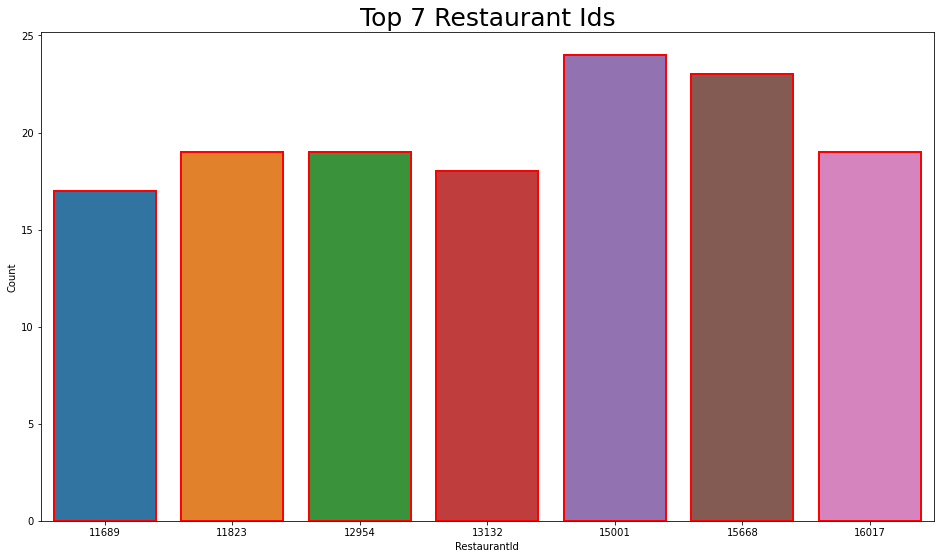

In [131]:
fig = plt.figure(figsize =(16,9))
plt.title('Top 7 Restaurant Ids',size =25)
ax = sns.barplot(data = outtput.iloc[:7], y = 'Count' ,x = 'RestaurantId',linewidth =2, edgecolor = 'red')

plt.xlabel('RestaurantId')
plt.ylabel('Count')
plt.show()

In [70]:
#INSIGHT 8
#INSIGHT GRAPH SHOWING THE HIGHEST 10 CUSTOMERS IDS THAT ORDERED THE MOST.

In [132]:
Customer_Id_count = data.groupby(['CUSTOMER ID'])['orderid'].count().reset_index(name ='CUSTOMERCount').sort_values(['CUSTOMERCount'], ascending = False)
Customer_Id_count.head(10)


,CUSTOMER ID,CUSTOMERCount
19682,1udns1n,56
20768,1ue2du2,47
18503,1udd2n2,47
13510,1nusf12,40
13035,1ndnues,39
15792,1u1f1dr,37
28669,1uuness,36
18089,1ud1sed,35
21898,1uesnfe,34
15897,1u1fnrd,33


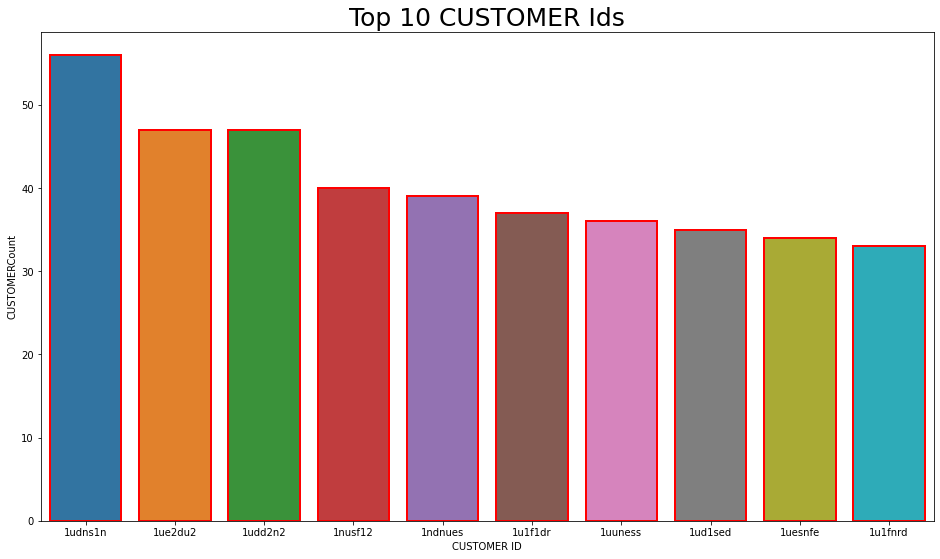

In [72]:
fig = plt.figure(figsize =(16,9))
plt.title('Top 10 CUSTOMER Ids',size =25)
ax = sns.barplot(data = Customer_Id_count.iloc[:10], y = 'CUSTOMERCount' ,x = 'CUSTOMER ID',linewidth =2, edgecolor = 'red')

plt.xlabel('CUSTOMER ID')
plt.ylabel('CUSTOMERCount')
plt.show()

In [73]:
#INSIGHT 9
#Assuming that Mondays to Thursdays are regarded as weekdays,Fridays to Sundays are regarded as weekends.Which of the two periods(Weekdays or Weekends)have had the most overal orders over the period.

In [115]:
#data['DATE'] = pd.to_datetime(data['DATE'])
#data['day_of_week'] = data['DATE'].dt.dayofweek
data['Day'] = pd.to_datetime(data['DATE']).dt.day_name()



In [116]:
DAY_count = data.groupby(['Day'])['orderid'].count().reset_index(name ='DAYCount').sort_values(['DAYCount'], ascending = False)
DAY_count.head(10)

,Day,DAYCount
0,Friday,19482
2,Saturday,16463
4,Thursday,14011
3,Sunday,13667
6,Wednesday,12380
5,Tuesday,12135
1,Monday,11862


In [117]:
data

,DATE,CUSTOMER ID,orderid,RestaurantId,Day of the Week,Day
0,2021/01/30,rededuf,49087764,1280,Saturday,Saturday
1,2021/02/11,1deesus,50281843,1280,Thursday,Thursday
2,2021/02/13,1usrfdn,50515965,1280,Saturday,Saturday
3,2021/02/14,eeddrdn,50655182,1280,Sunday,Sunday
4,2021/02/15,1rr1u1n,50760529,1280,Monday,Monday
...,...,...,...,...,...,...
99995,2021/05/22,1uedfsf,61560181,18687,Saturday,Saturday
99996,2021/06/01,1uddd2n,62895913,18687,Tuesday,Tuesday
99997,2021/06/04,1rde2dd,63239996,18687,Friday,Friday
99998,2021/06/07,12ddnrn,63671446,18687,Monday,Monday


In [100]:
grouped = data.groupby('Day of the Week').count()

In [101]:
grouped 

,DATE,CUSTOMER ID,orderid,RestaurantId
Day of the Week,,,,
Friday,19482,19482,19482,19482
Monday,11862,11862,11862,11862
Saturday,16463,16463,16463,16463
Sunday,13667,13667,13667,13667
Thursday,14011,14011,14011,14011
Tuesday,12135,12135,12135,12135
Wednesday,12380,12380,12380,12380


In [129]:
monday_count = 11862
tuesday_count = 12135
wednesday_count = 12380
thursday_count = 14011
friday_count = 19482
saturday_count = 16463
sunday_count = 13667

def order_summary(DAY_count):
    for row in reader:
        Day= row[0]
        DAYCount = int(row[1])
        # Add the order count to the corresponding day
        if  Day == "Monday":
            monday_count +=DAYCount 
        elif  Day == "Tuesday":
            tuesday_count += DAYCount
        elif  Day == "Wednesday":
            wednesday_count += DAYCount
        elif  Day == "Thursday":
            thursday_count += DAYCount
        elif  Day == "Friday":
            friday_count += DAYCount
        elif  Day == "Saturday":
            saturday_count += DAYCount
        elif  Day == "Sunday":
            sunday_count += DAYCount

# Calculate the total orders for weekdays and weekends
weekday_orders = monday_count + tuesday_count + wednesday_count + thursday_count 
weekend_orders = friday_count + saturday_count + sunday_count



# Print the results
print("Weekday Orders:", weekday_orders)
print("Weekend Orders:", weekend_orders)

Weekday Orders: 50388
Weekend Orders: 49612


In [121]:
#Conclusion is weekdays had more orders compared to weekends.